In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
from sklearn.metrics import log_loss


#Csv 파일을 읽어들인다.

train = pd.read_csv('Horror.csv', skiprows=1, names=['Text', 'sentiment'])
test = pd.read_csv('Horror_Test.csv',skiprows=0, names=['Text', 'sentiment'])
train.index = [id for id in train.index]

In [2]:
#파일을 읽어들여서 정보를 표시한다.

display(train.head())
display(test.head())


print('Training Dataset Info:')
display(train.info())
print('Test Dataset Info:')
display(train.info())



,Text,sentiment
0,a whimpering middleaged man pulls against the ...,cruel
1,the original saw movie was better than i expec...,cruel
2,thats the question to ask before you see this ...,cruel
3,standing ovation for fede alvarezwow saw the m...,cruel
4,i had one of the most intense viewing experien...,cruel


,Text,sentiment
0,i watched with a good opening night crowd here...,cruel
1,review written with possible spoilers so i jus...,cruel
2,to say the least i was not disappointed i enjo...,cruel
3,the saw series has always been a standard of s...,cruel
4,of all the saw films so far this has to be the...,cruel


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10103 entries, 0 to 10102
Data columns (total 2 columns):
Text         10103 non-null object
sentiment    10103 non-null object
dtypes: object(2)
memory usage: 236.8+ KB


None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10103 entries, 0 to 10102
Data columns (total 2 columns):
Text         10103 non-null object
sentiment    10103 non-null object
dtypes: object(2)
memory usage: 236.8+ KB


None

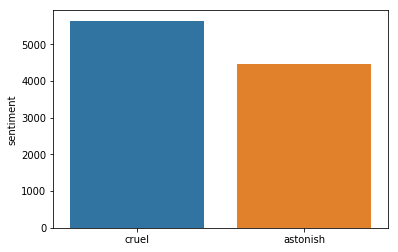

In [3]:
# Barplot of occurances of each author in the training dataset
sns.barplot(x=['cruel', 'astonish'], y=train['sentiment'].value_counts())
plt.show()

Number of words in all_text: 13482456


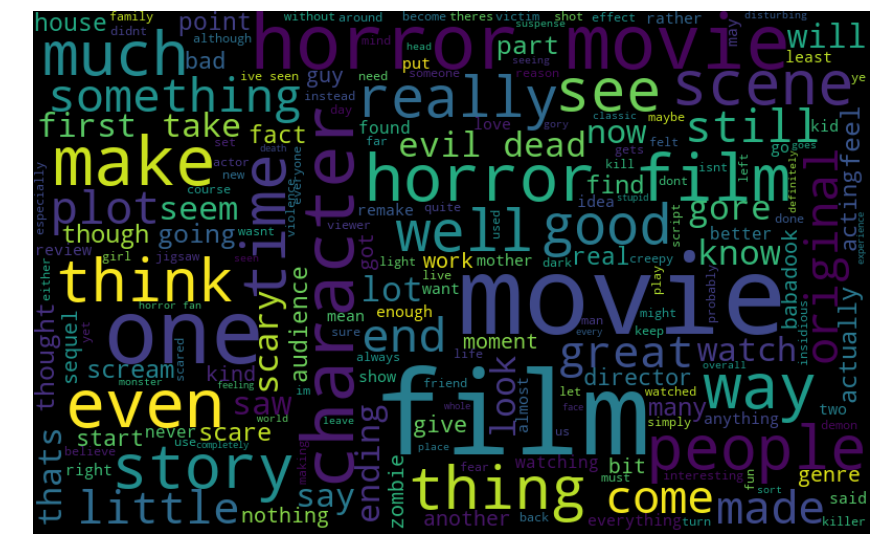

In [5]:
# Combine all training text into one large string
all_text = ' '.join([text for text in train['Text']])
print('Number of words in all_text:', len(all_text))

wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [4]:
from keras.preprocessing.text import Tokenizer
A, B = [], []


#트레인과 테스트 쓸모없는 값을 제거
for i in train['Text']:
    i = re.sub('[^a-zA-Z0-9 \n\.]', '', i)
    i = i.replace("br","").replace("  "," ").replace("   "," ")
    A.append(i)
    
for i in test['Text']:
    i = re.sub('[^a-zA-Z0-9 \n\.]', '', i)
    i = i.replace("br","").replace("  "," ").replace("   "," ")
    B.append(i)
    

train['Text'] = A
test['Text'] = B

print(train['Text'][30])
print(test['Text'][30])

Using TensorFlow backend.


i saw this without seeing the original after which i did see the original but that is a different review for a different day this movie starts out with a scene that totally sets up the tone which also gives us a wonderful sneak peak at what to come the beginning being the scene where you first see the demon and they can shut off the evil demon routine and be the real person i really enjoyed that i loved how they played that up in the movie which gives a great moral fight with some characters then we see the characters we are supposed to like but really the only character i cared about was mia the main girl which i thought was really well played by jane levy and for his credit the main guy david wasnt bad either the filmmakers also give really great updates from the original that in my opinion improve on it i wont spoil it here though however its really good i also really wanna touch on the gore the movie uses practical effects so much that it becomes a love letter to people who grew up

In [5]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer(nb_words=5000)
test_label = []
train_label = []
t.fit_on_texts(train['Text'])
t.fit_on_texts(test['Text'])

for i in train['sentiment']:
    if i == 'cruel':
        train_label.append(1)
    else:
        train_label.append(0)
        
for i in test['sentiment']:
    if i == 'cruel':
        test_label.append(1)
    else:
        test_label.append(0)
        
train_result = t.texts_to_sequences(train['Text'])
test_result = t.texts_to_sequences(test['Text'])
vocab_size = len(t.word_index)

print(train_result.__len__())
print(train_label.__len__())
print(test_label.__len__())
print(test_result.__len__())

print("train_label = ",train_label)
print("test_label = ",test_label)

print(train_result[2])

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


10103
10103
267
267
train_label =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train = train_result
y_train = train_label
X_test = test_result
y_test = test_label

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
print(X_train[0])
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    3  306 2554  667    1
 3310 

KeyboardInterrupt: 

In [ ]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
X_train = train_result
y_train = train_label
X_test = test_result
y_test = test_label# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], '#FF007F', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________